In [28]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import mlxtend

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [31]:
books=pd.read_csv('/content/book.csv')

books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [32]:
books['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

In [33]:
books['YouthBks'].value_counts()

0    1505
1     495
Name: YouthBks, dtype: int64

In [34]:
books['CookBks'].value_counts()

0    1138
1     862
Name: CookBks, dtype: int64

In [35]:
books['DoItYBks'].value_counts()

0    1436
1     564
Name: DoItYBks, dtype: int64

In [36]:
#preprocessing
df=pd.get_dummies(books)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [37]:
#apriori algo

freq_books=apriori(df,min_support=0.1,use_colnames=True)

freq_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [38]:
rules=association_rules(freq_books,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [39]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [40]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


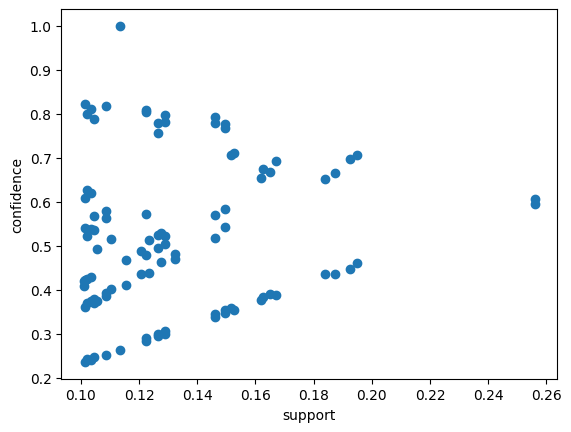

In [41]:
#plotting

plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [42]:
#support 20% confidence 75%

f_books=apriori(df,min_support=0.2,use_colnames=True)
f_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [44]:
rules1=association_rules(f_books,metric='lift',min_threshold=0.75)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [45]:
rules1.sort_values('lift',ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


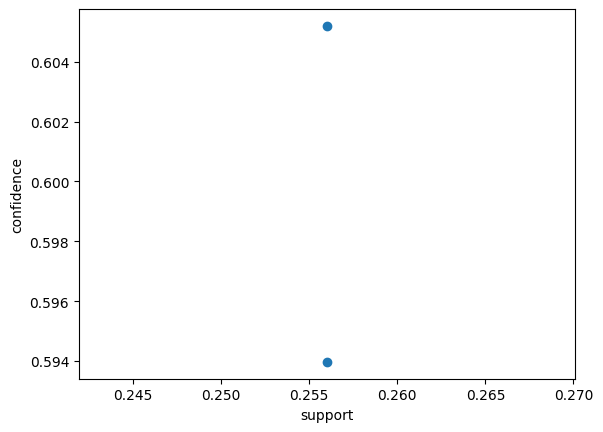

In [46]:

plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [48]:
#q2.MOVIES

movie=pd.read_csv('/content/my_movies.csv')
movie.head()


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [49]:
movie['V1'].value_counts()

Gladiator        6
Sixth Sense      2
LOTR1            1
Harry Potter1    1
Name: V1, dtype: int64

In [50]:
movie['V2'].value_counts()

Patriot          6
LOTR1            1
LOTR2            1
Harry Potter2    1
LOTR             1
Name: V2, dtype: int64

In [51]:
movie['V3'].value_counts()

Sixth Sense      4
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

In [53]:
movie['Sixth Sense'].value_counts()

1    6
0    4
Name: Sixth Sense, dtype: int64

In [54]:
df1=pd.get_dummies(movie)
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [55]:
freq_movies=apriori(df1,min_support=0.3,use_colnames=True)

freq_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa..."
59,0.4,"(V3_Sixth Sense, Sixth Sense, Gladiator, V1_Gl..."
60,0.4,"(V3_Sixth Sense, Sixth Sense, V2_Patriot, V1_G..."
61,0.4,"(V3_Sixth Sense, Gladiator, V2_Patriot, V1_Gla..."


In [56]:
rules=association_rules(freq_movies,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V3_Sixth Sense, Gladiator, V1_Gladiator, V2_P...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(Gladiator),"(V3_Sixth Sense, Sixth Sense, V1_Gladiator, V2...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V2_Patriot),"(V3_Sixth Sense, Sixth Sense, Gladiator, V1_Gl...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V1_Gladiator),"(V3_Sixth Sense, Sixth Sense, Gladiator, V2_Pa...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [57]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
505,(V3_Sixth Sense),"(Sixth Sense, V2_Patriot, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
496,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, V1_Gladiator, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
492,"(Sixth Sense, V2_Patriot, Patriot)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
491,"(Sixth Sense, V2_Patriot, V1_Gladiator)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
490,"(V1_Gladiator, V3_Sixth Sense, Patriot)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
489,"(V2_Patriot, V3_Sixth Sense, Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
488,"(V1_Gladiator, V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
484,"(Sixth Sense, V2_Patriot, V1_Gladiator, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
475,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V1_Gladiator, V2_Patr...",0.4,0.4,0.4,1.0,2.5,0.24,inf
233,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


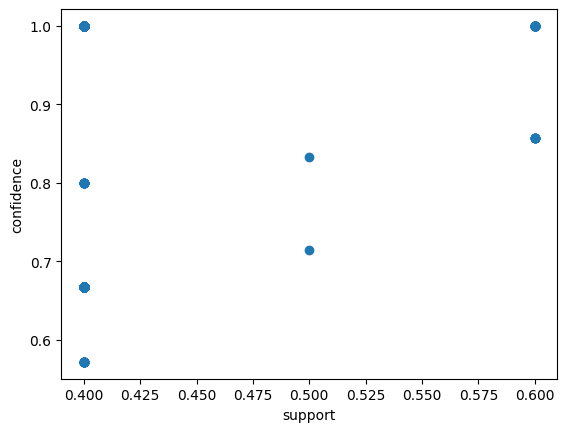

In [60]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

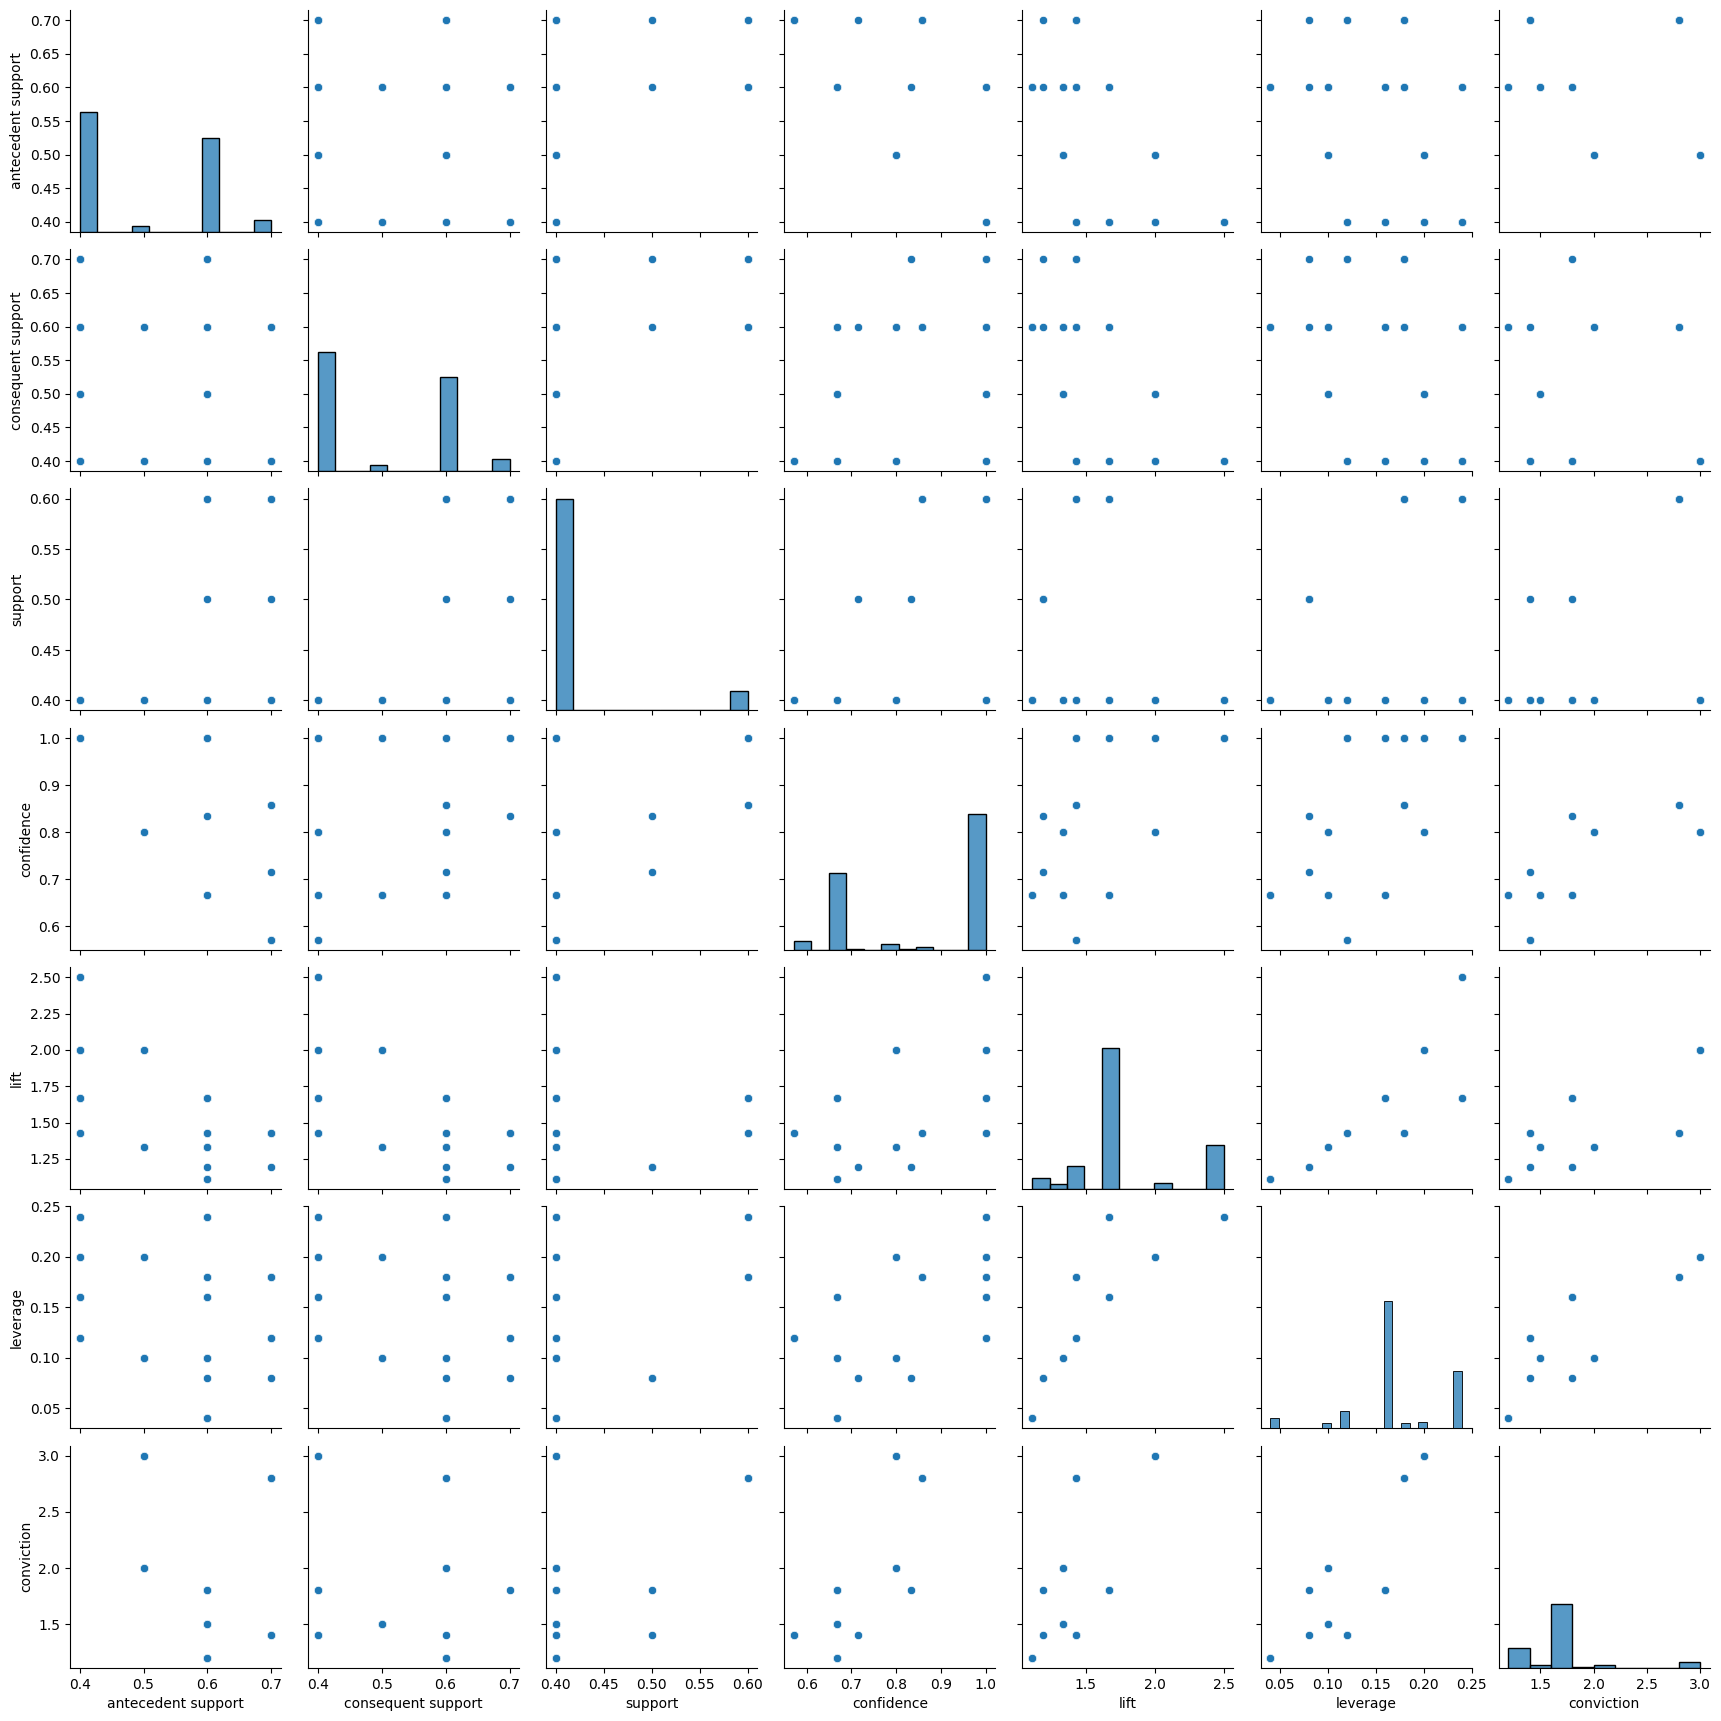

In [63]:
sns.pairplot(rules)

In [66]:
#support 50% confidence 80%
f_movies=apriori(df1,min_support=0.5,use_colnames=True)

In [67]:
f_movies


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [70]:
rules1=association_rules(f_movies,min_threshold=0.8,metric='lift')

In [71]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [72]:
rules1.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(Gladiator, V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


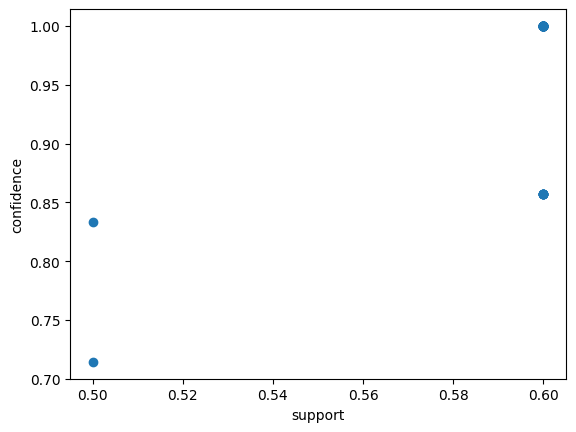

In [73]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

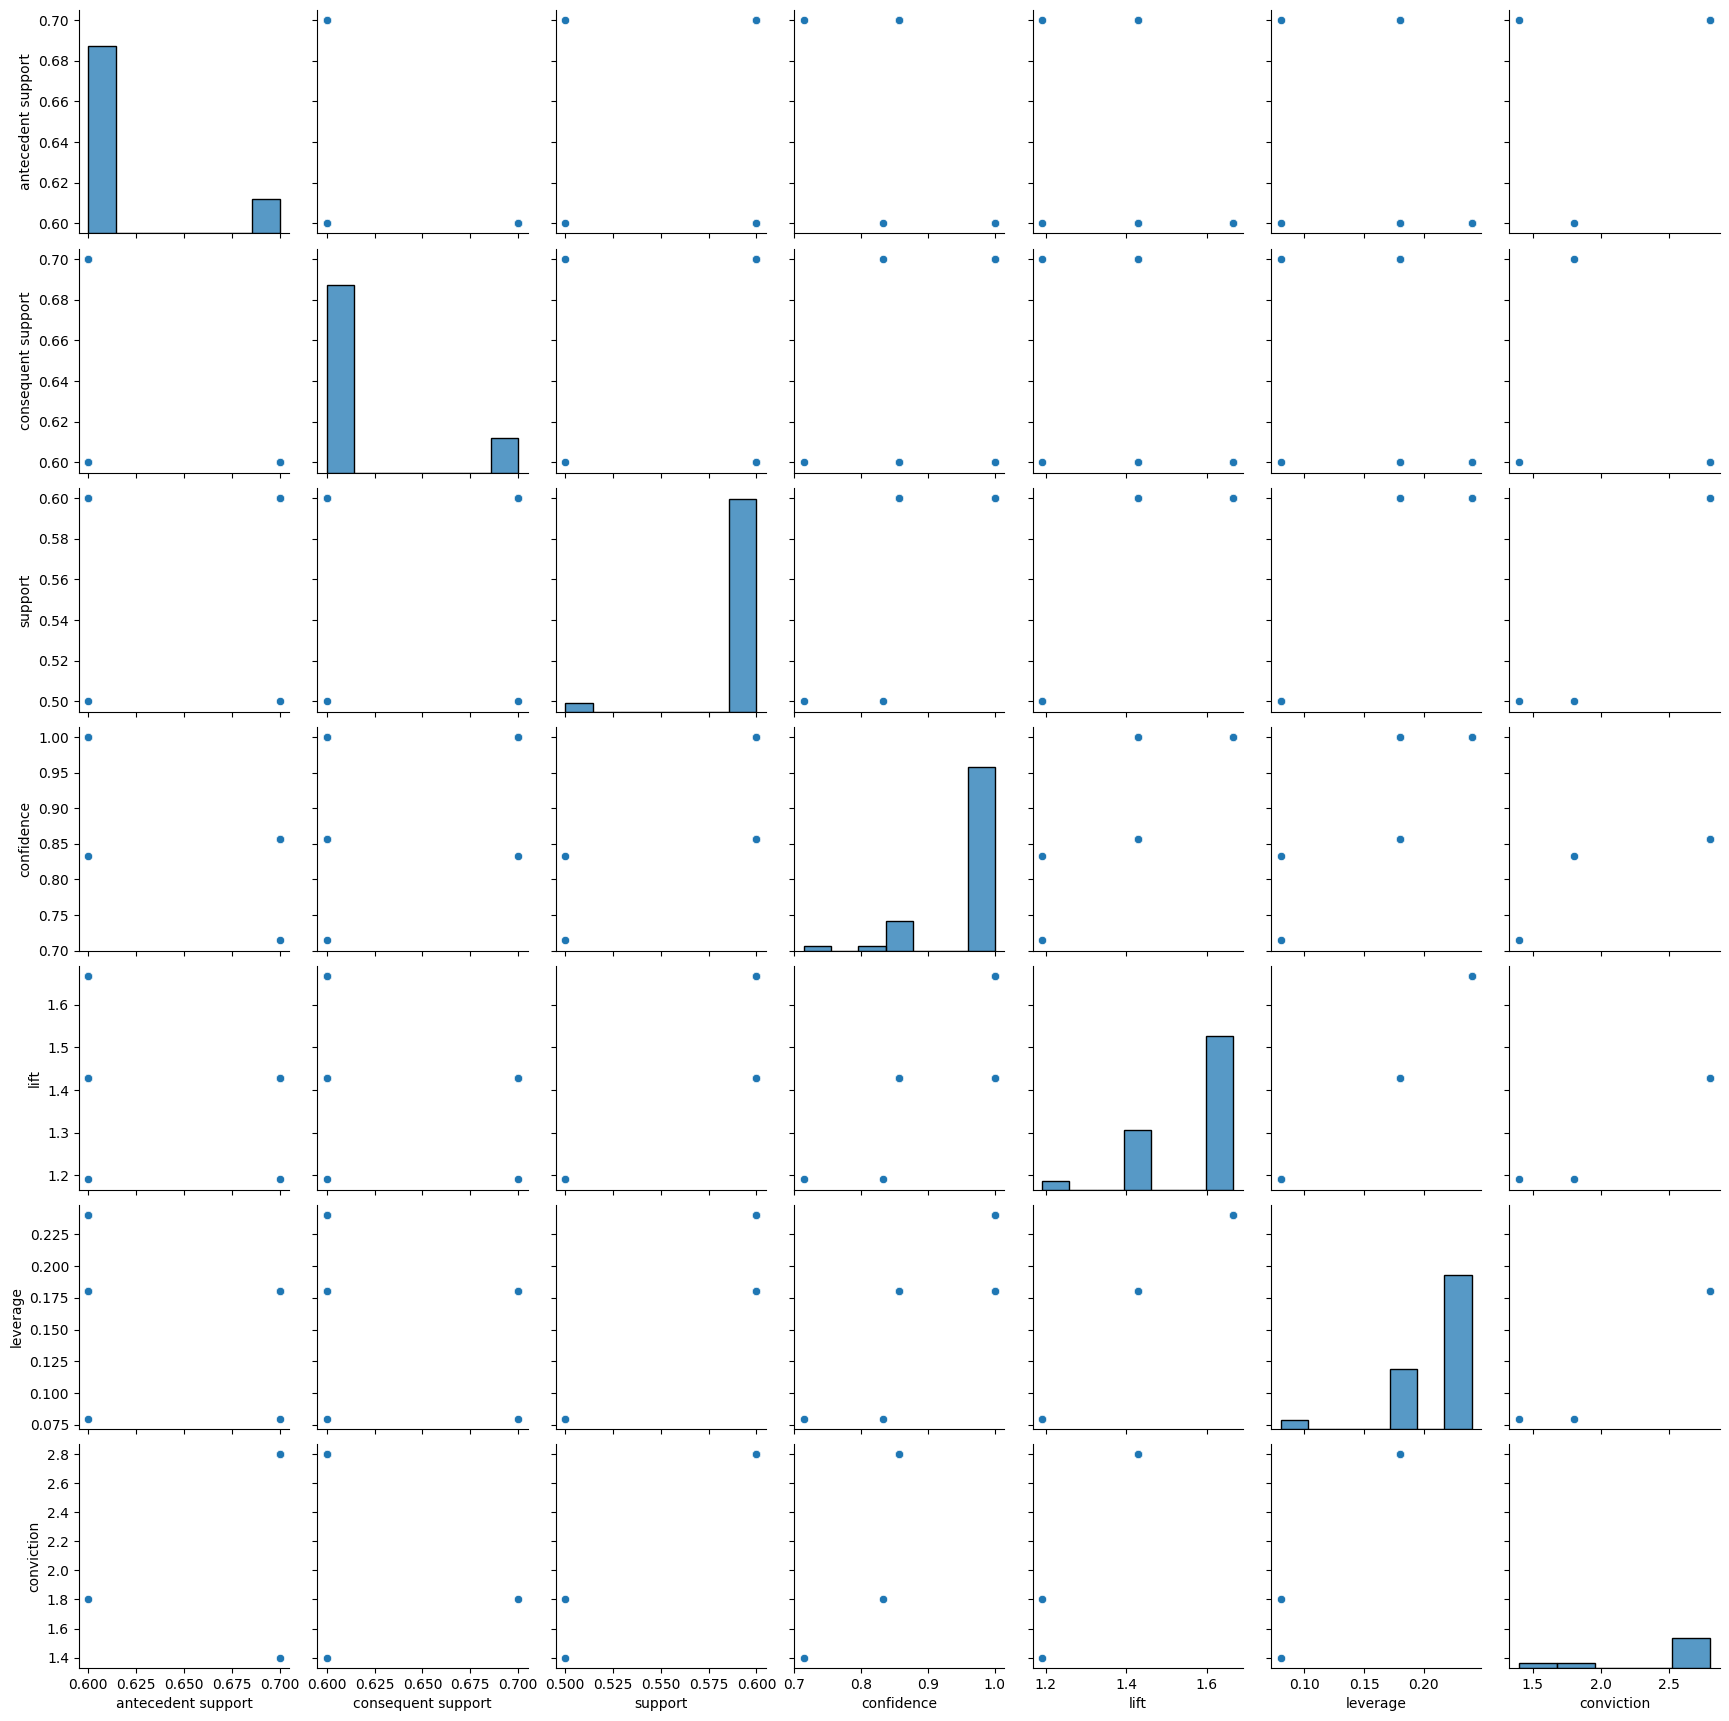

In [74]:
sns.pairplot(rules1)